In [1]:
import h5py
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense  
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
import tables
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
dataPath = '/home/WindowsDrive/Shared/Top_Tagging_Data/test.h5'
# trainDictFile = open('trainDict.pkl', 'w')
# testDictFile = open('testDict.pkl', 'w')
# tagger_type = 'pfn'

## Putting the data into an array, as well as making the arrays of labels and weights, then saving them to file so we don't need to leave them in memory the whole time

## DON'T RUN THIS AGAIN UNLESS YOU HAVE TO

In [3]:
"""

with h5py.File(dataPath, 'r') as data:

    npDataLabels = np.array(data['labels'])
    np.save('/home/WindowsDrive/Shared/Top_Tagging_Data/npDataLabels.npy', npDataLabels)
    del(npDataLabels)

    npDataWeights = np.array(data['weights'])
    np.save('/home/WindowsDrive/Shared/Top_Tagging_Data/npDataWeights.npy', npDataWeights)
    del(npDataWeights)

    
    constitDataArr = []

    for key in data.attrs.get('constit'):
        constitDataArr.append(data[key][...])

    npConstitDataArr = np.array(constitDataArr)
    del(constitDataArr)

    np.save('/home/WindowsDrive/Shared/Top_Tagging_Data/npConstitDataArr.npy', npConstitDataArr)
    del(npConstitDataArr)

    jetDataArr = []

    for key in ['fjet_eta', 'fjet_m', 'fjet_phi', 'fjet_pt']:
        jetDataArr.append(data[key][...])
    
    npJetDataArr = np.array(jetDataArr)
    del(jetDataArr)

    np.save('/home/WindowsDrive/Shared/Top_Tagging_Data/npJetDataArr.npy', npJetDataArr)
    del(npJetDataArr)

"""


"\n\nwith h5py.File(dataPath, 'r') as data:\n\n    npDataLabels = np.array(data['labels'])\n    np.save('/home/WindowsDrive/Shared/Top_Tagging_Data/npDataLabels.npy', npDataLabels)\n    del(npDataLabels)\n\n    npDataWeights = np.array(data['weights'])\n    np.save('/home/WindowsDrive/Shared/Top_Tagging_Data/npDataWeights.npy', npDataWeights)\n    del(npDataWeights)\n\n    \n    constitDataArr = []\n\n    for key in data.attrs.get('constit'):\n        constitDataArr.append(data[key][...])\n\n    npConstitDataArr = np.array(constitDataArr)\n    del(constitDataArr)\n\n    np.save('/home/WindowsDrive/Shared/Top_Tagging_Data/npConstitDataArr.npy', npConstitDataArr)\n    del(npConstitDataArr)\n\n    jetDataArr = []\n\n    for key in ['fjet_eta', 'fjet_m', 'fjet_phi', 'fjet_pt']:\n        jetDataArr.append(data[key][...])\n    \n    npJetDataArr = np.array(jetDataArr)\n    del(jetDataArr)\n\n    np.save('/home/WindowsDrive/Shared/Top_Tagging_Data/npJetDataArr.npy', npJetDataArr)\n    del(npJ

## Here we import the data again and split it up into test and train

In [4]:
"""constitDataArr = np.load('/home/WindowsDrive/Shared/Top_Tagging_Data/npConstitDataArr.npy')
labelsArr = np.load('/home/WindowsDrive/Shared/Top_Tagging_Data/npDataLabels.npy')
weightsArr = np.load('/home/WindowsDrive/Shared/Top_Tagging_Data/npDataWeights.npy')

pt_train, pt_test, eta_train, eta_test, phi_train, phi_test, E_train, E_test, labels_train, labels_test, weights_train, weights_test = train_test_split(constitDataArr[0], constitDataArr[1], constitDataArr[2], constitDataArr[3], labelsArr, weightsArr, test_size=0.33, random_state=69, shuffle=True)

del(constitDataArr)
del(labelsArr)
del(weightsArr)"""


"constitDataArr = np.load('/home/WindowsDrive/Shared/Top_Tagging_Data/npConstitDataArr.npy')\nlabelsArr = np.load('/home/WindowsDrive/Shared/Top_Tagging_Data/npDataLabels.npy')\nweightsArr = np.load('/home/WindowsDrive/Shared/Top_Tagging_Data/npDataWeights.npy')\n\npt_train, pt_test, eta_train, eta_test, phi_train, phi_test, E_train, E_test, labels_train, labels_test, weights_train, weights_test = train_test_split(constitDataArr[0], constitDataArr[1], constitDataArr[2], constitDataArr[3], labelsArr, weightsArr, test_size=0.33, random_state=69, shuffle=True)\n\ndel(constitDataArr)\ndel(labelsArr)\ndel(weightsArr)"

## Trying high level now instead of constituent because fuck that much data

In [5]:
with h5py.File(dataPath, 'r') as data:

    npDataLabels = np.array(data['labels'])

    npDataWeights = np.array(data['weights'])
    
    hlDataArr = {key: data[key][...] for key in data.attrs.get('hl')}

    df = pd.DataFrame(hlDataArr)


In [6]:
data_train, data_test, labels_train, labels_test, weights_train, weights_test = train_test_split(df, npDataLabels, npDataWeights, test_size=0.33, random_state=69, shuffle=True)

In [11]:
df_train = pd.DataFrame()
df_train["label"] = labels_train
df_train["weights"] = weights_train

sigSumWeights = np.sum(df_train[df_train["label"]==1]["weights"])
bkgSumWeights = np.sum(df_train[df_train["label"]==0]["weights"])

print(sigSumWeights)

scale = (bkgSumWeights/sigSumWeights)
df_train.loc[df_train.label==1, "weights"] *= scale

modsigSumWeights = np.sum(df_train[df_train["label"]==1]["weights"])

print(modsigSumWeights)


final_weights_train = df_train["weights"]

831597.0
833473.1


In [19]:
model = Sequential()
model.add(keras.Input(shape=15))
model.add(Dense(20, activation='relu', kernel_regularizer=None, kernel_initializer='glorot_uniform'))
model.add(Dense(20, activation='relu', kernel_regularizer=None, kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')   
model.fit(data_train, labels_train, sample_weight=final_weights_train, epochs=8, batch_size=100, verbose=1)

Epoch 1/8
16644/16644 [==============================] - 37s 2ms/step - loss: 5330289819648.0000
Epoch 2/8
16644/16644 [==============================] - 37s 2ms/step - loss: 970191536128.0000
Epoch 3/8
16644/16644 [==============================] - 36s 2ms/step - loss: 1746.8402
Epoch 4/8
16644/16644 [==============================] - 36s 2ms/step - loss: 0.6942
Epoch 5/8
16644/16644 [==============================] - 36s 2ms/step - loss: 0.6943
Epoch 6/8
16644/16644 [==============================] - 37s 2ms/step - loss: 0.6944
Epoch 7/8
16644/16644 [==============================] - 37s 2ms/step - loss: 0.6945
Epoch 8/8
16644/16644 [==============================] - 38s 2ms/step - loss: 0.6945


In [20]:
pred_test = model.predict(data_test)


25618/25618 [==============================] - 27s 1ms/step


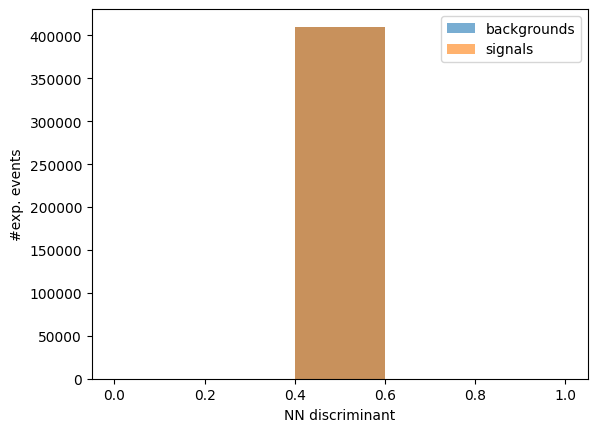

In [21]:
dfNN = pd.DataFrame()
dfNN["labels"] = labels_test
dfNN["predictions"] = pred_test
dfNN["weights"] = weights_test

signalVals = dfNN[dfNN['labels']== 1] 
backgroundVals = dfNN[dfNN['labels']== 0] 

plt.figure()
plt.xlabel("NN discriminant")
plt.ylabel("#exp. events")

# bkgHistNN = plt.hist(backgroundVals["predictions"], bins=5, weights=backgroundVals["weights"],label="backgrounds", range=[0,1], alpha=0.6)
# sigHistNN = plt.hist(signalVals["predictions"], bins=5, weights=signalVals["weights"],  label=r"$H\rightarrow \tau\tau$ signal",range=[0,1], alpha=0.6)

bkgHistNN = plt.hist(backgroundVals['predictions'], bins=5, label="backgrounds", range=[0,1], alpha=0.6)
sigHistNN = plt.hist(signalVals['predictions'], bins=5, label="signals", range=[0,1], alpha=0.6)

plt.legend()
# plt.yscale('log')
plt.show()

In [22]:
pred_train = model.predict(data_train)

52012/52012 [==============================] - 59s 1ms/step


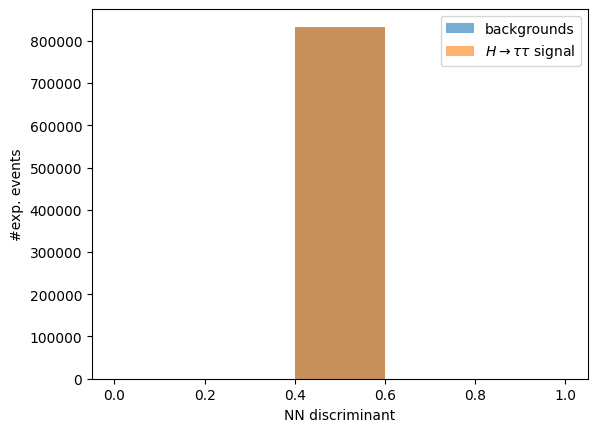

In [23]:
dfNN = pd.DataFrame()
dfNN["labels"] = labels_train
dfNN["predictions"] = pred_train
dfNN["weights"] = weights_train

signalVals = dfNN[dfNN['labels']== 1] 
backgroundVals = dfNN[dfNN['labels']== 0] 

plt.figure()
plt.xlabel("NN discriminant")
plt.ylabel("#exp. events")

bkgHistNN = plt.hist(backgroundVals["predictions"], bins=5, weights=backgroundVals["weights"],label="backgrounds", range=[0,1], alpha=0.6)
sigHistNN = plt.hist(signalVals["predictions"], bins=5, weights=signalVals["weights"],  label=r"$H\rightarrow \tau\tau$ signal",range=[0,1], alpha=0.6)

plt.legend()
#plt.yscale('log')
plt.show()